



## 1. プログラムの概要と目的

### 概要
このプログラムは、複数の証明書フォーマット（PEM、DER、PKCS#7）に対応した証明書解析ツールです。データベースから証明書データを取得し、証明書からドメイン情報を抽出・分析します。また、証明書の有効性やマルチドメイン証明書の割合、フォールバック解析の利用状況などを統計的に評価し、可視化する機能を備えています。

### 目的
- **証明書データの解析:** 証明書内のドメイン情報を抽出し、証明書の特性を分析する。
- **フォールバック解析:** 証明書の解析に失敗した場合、代替データを利用して再解析を試みることで解析の成功率を向上させる。
- **エラーハンドリング:** 証明書解析時のエラーを分類・集計し、エラー統計をレポートする。
- **データベース連携:** PostgreSQL データベースから証明書データを取得し、動的に解析を行う。
- **解析結果の可視化:** Matplotlib と日本語フォントを利用し、証明書の有効性やフォールバックの利用状況をグラフとして出力する。

---

## 2. 主な機能と特徴

### 主な機能
1. **証明書データのクリーニングと変換**
   - 文字列形式で与えられた証明書データを適切に処理し、PEM/DER/PKCS#7 の各形式に応じたバイト列に変換。

2. **ドメイン抽出**
   - **SAN (Subject Alternative Name) 拡張**: 証明書内の SAN 拡張から DNS 名を抽出。
   - **Common Name (CN)**: SAN に含まれていない場合、CN からもドメイン名を取得。

3. **フォールバック解析**
   - プライマリ証明書の解析に失敗した場合、フォールバックの証明書データを利用して再解析を試みる。
   - フォールバック成功時には、その情報を結果に反映。

4. **データベース連携**
   - PostgreSQL データベースから証明書データを取得し、証明書の解析を動的に実施。

5. **詳細な結果の出力**
   - 抽出したドメイン情報、エラー内容、フォールバック利用状況などを CSV ファイルとして保存。

6. **解析結果の可視化**
   - Matplotlib と日本語フォントを利用して以下の内容をグラフ化：
     - 証明書の有効性（有効/無効の割合）
     - ドメイン数の分布
     - フォールバック利用状況

---

### 特徴
- **多様な証明書形式に対応**
  - PEM、DER、PKCS#7 の形式を自動判別し、適切に解析を実施。
  
- **エラーハンドリングの充実**
  - 発生するエラーを詳細に分類（ASN.1 パースエラー、16進数形式エラー、解析エラーなど）。
  - エラー統計を集計し、解析全体の健全性をモニタリング可能。

- **フォールバック機能による信頼性向上**
  - 一度の失敗で解析を諦めず、代替データを用いた再解析を実施。

- **柔軟な設定**
  - 設定ファイル（JSON形式）により、データベース接続情報などを簡単に変更可能。

- **グラフィカルなレポート**
  - 統計情報やエラー統計、ドメイン数のヒストグラムなどを視覚的に把握しやすい形式で出力。

---

## 3. プログラムの処理フロー

1. **データベースから証明書データを取得**
   - PostgreSQL から `https_certificate_body` と `https_certificate_all` を取得。
   - `status = 7` の条件を満たすレコードのみ処理対象とする。

2. **証明書データの解析**
   - `clean_cert_data` 関数で証明書データのクリーニング（PEM/DER/PKCS#7 に応じた適切な処理）。
   - `load_certificate_from_data` 関数で X.509 証明書をパース。
   - `extract_domains` 関数でドメイン情報を抽出。

3. **フォールバック解析の適用**
   - `extract_domains_with_fallback` 関数により、プライマリ証明書が解析に失敗した場合、フォールバックデータで再解析を試行。

4. **統計情報の算出**
   - 有効な証明書数、無効な証明書数、マルチドメイン証明書の割合、フォールバック利用率などを計算。

5. **解析結果の保存**
   - CSV ファイルとして詳細な解析結果を保存。

6. **解析結果の可視化**
   - 証明書の有効性、ドメイン数の分布、フォールバック利用状況をグラフとして出力。

---

## 4. 出力情報

### 4.1 サマリー情報
- 総証明書数
- 有効な証明書数と割合
- 無効な証明書数と割合
- マルチドメイン証明書の数と割合
- 証明書あたりの平均ドメイン数・最大ドメイン数
- フォールバック利用証明書数と割合

### 4.2 エラー統計
- 総処理証明書数
- 成功した証明書解析の割合
- エラーの内訳（ASN.1 エラー、HEX エラー、解析エラー、ドメインなしエラーなど）

### 4.3 可視化（Matplotlib）
- 証明書の有効性（円グラフ）
- ドメイン数の分布（ヒストグラム）
- フォールバック利用状況（円グラフ）

---

## 5. 想定される利用シーン

- **証明書管理**: 大量の証明書データを効率的に管理し、適切なドメインが設定されているか確認する。
- **セキュリティ監査**: 有効期限や証明書の構造を分析し、不正な証明書が含まれていないかチェックする。
- **データ品質評価**: 証明書データベースの品質を評価し、エラー率やマルチドメイン証明書の割合を把握する。

---

## 6. まとめ
このプログラムは、複数形式の証明書データを解析し、証明書の有効性やドメイン情報を詳細に分析するためのツールです。フォールバック解析やエラーハンドリング機能を備えており、証明書データベースの品質管理やセキュリティ監査に有用です。さらに、統計情報を可視化することで、証明書データの傾向を直感的に把握することができます。



website_data の分析を開始...
取得したレコード数: 11833

normal_sites の分析を開始...
取得したレコード数: 9591

=== 証明書分析サマリー ===

website_data:
総証明書数: 11,833
有効な証明書: 11,832 (100.0%)
無効な証明書: 1 (0.0%)

マルチドメイン証明書数: 8,855
マルチドメイン証明書の割合: 74.8%
証明書あたりの平均ドメイン数: 30.68
証明書あたりの最大ドメイン数: 139
フォールバック利用証明書数: 118 (1.0%)

ドメイン数の分布:
1ドメイン: 2,977 件 (25.2%)
2ドメイン: 3,348 件 (28.3%)
3ドメイン: 180 件 (1.5%)
4ドメイン: 137 件 (1.2%)
5ドメイン: 319 件 (2.7%)
6ドメイン: 66 件 (0.6%)
7ドメイン: 201 件 (1.7%)
8ドメイン: 181 件 (1.5%)
9ドメイン: 92 件 (0.8%)
10ドメイン: 101 件 (0.9%)
11ドメイン: 35 件 (0.3%)
12ドメイン: 39 件 (0.3%)
13ドメイン: 18 件 (0.2%)
14ドメイン: 6 件 (0.1%)
15ドメイン: 15 件 (0.1%)
16ドメイン: 26 件 (0.2%)
17ドメイン: 23 件 (0.2%)
18ドメイン: 3 件 (0.0%)
19ドメイン: 5 件 (0.0%)
20ドメイン: 71 件 (0.6%)
21ドメイン: 2 件 (0.0%)
22ドメイン: 4 件 (0.0%)
23ドメイン: 1 件 (0.0%)
24ドメイン: 35 件 (0.3%)
25ドメイン: 2 件 (0.0%)
26ドメイン: 11 件 (0.1%)
28ドメイン: 2 件 (0.0%)
29ドメイン: 6 件 (0.1%)
30ドメイン: 94 件 (0.8%)
31ドメイン: 1 件 (0.0%)
32ドメイン: 8 件 (0.1%)
33ドメイン: 1 件 (0.0%)
34ドメイン: 2 件 (0.0%)
35ドメイン: 5 件 (0.0%)
36ドメイン: 2 件 (0.0%)
38ドメイン: 3 件 (0.0%)
4

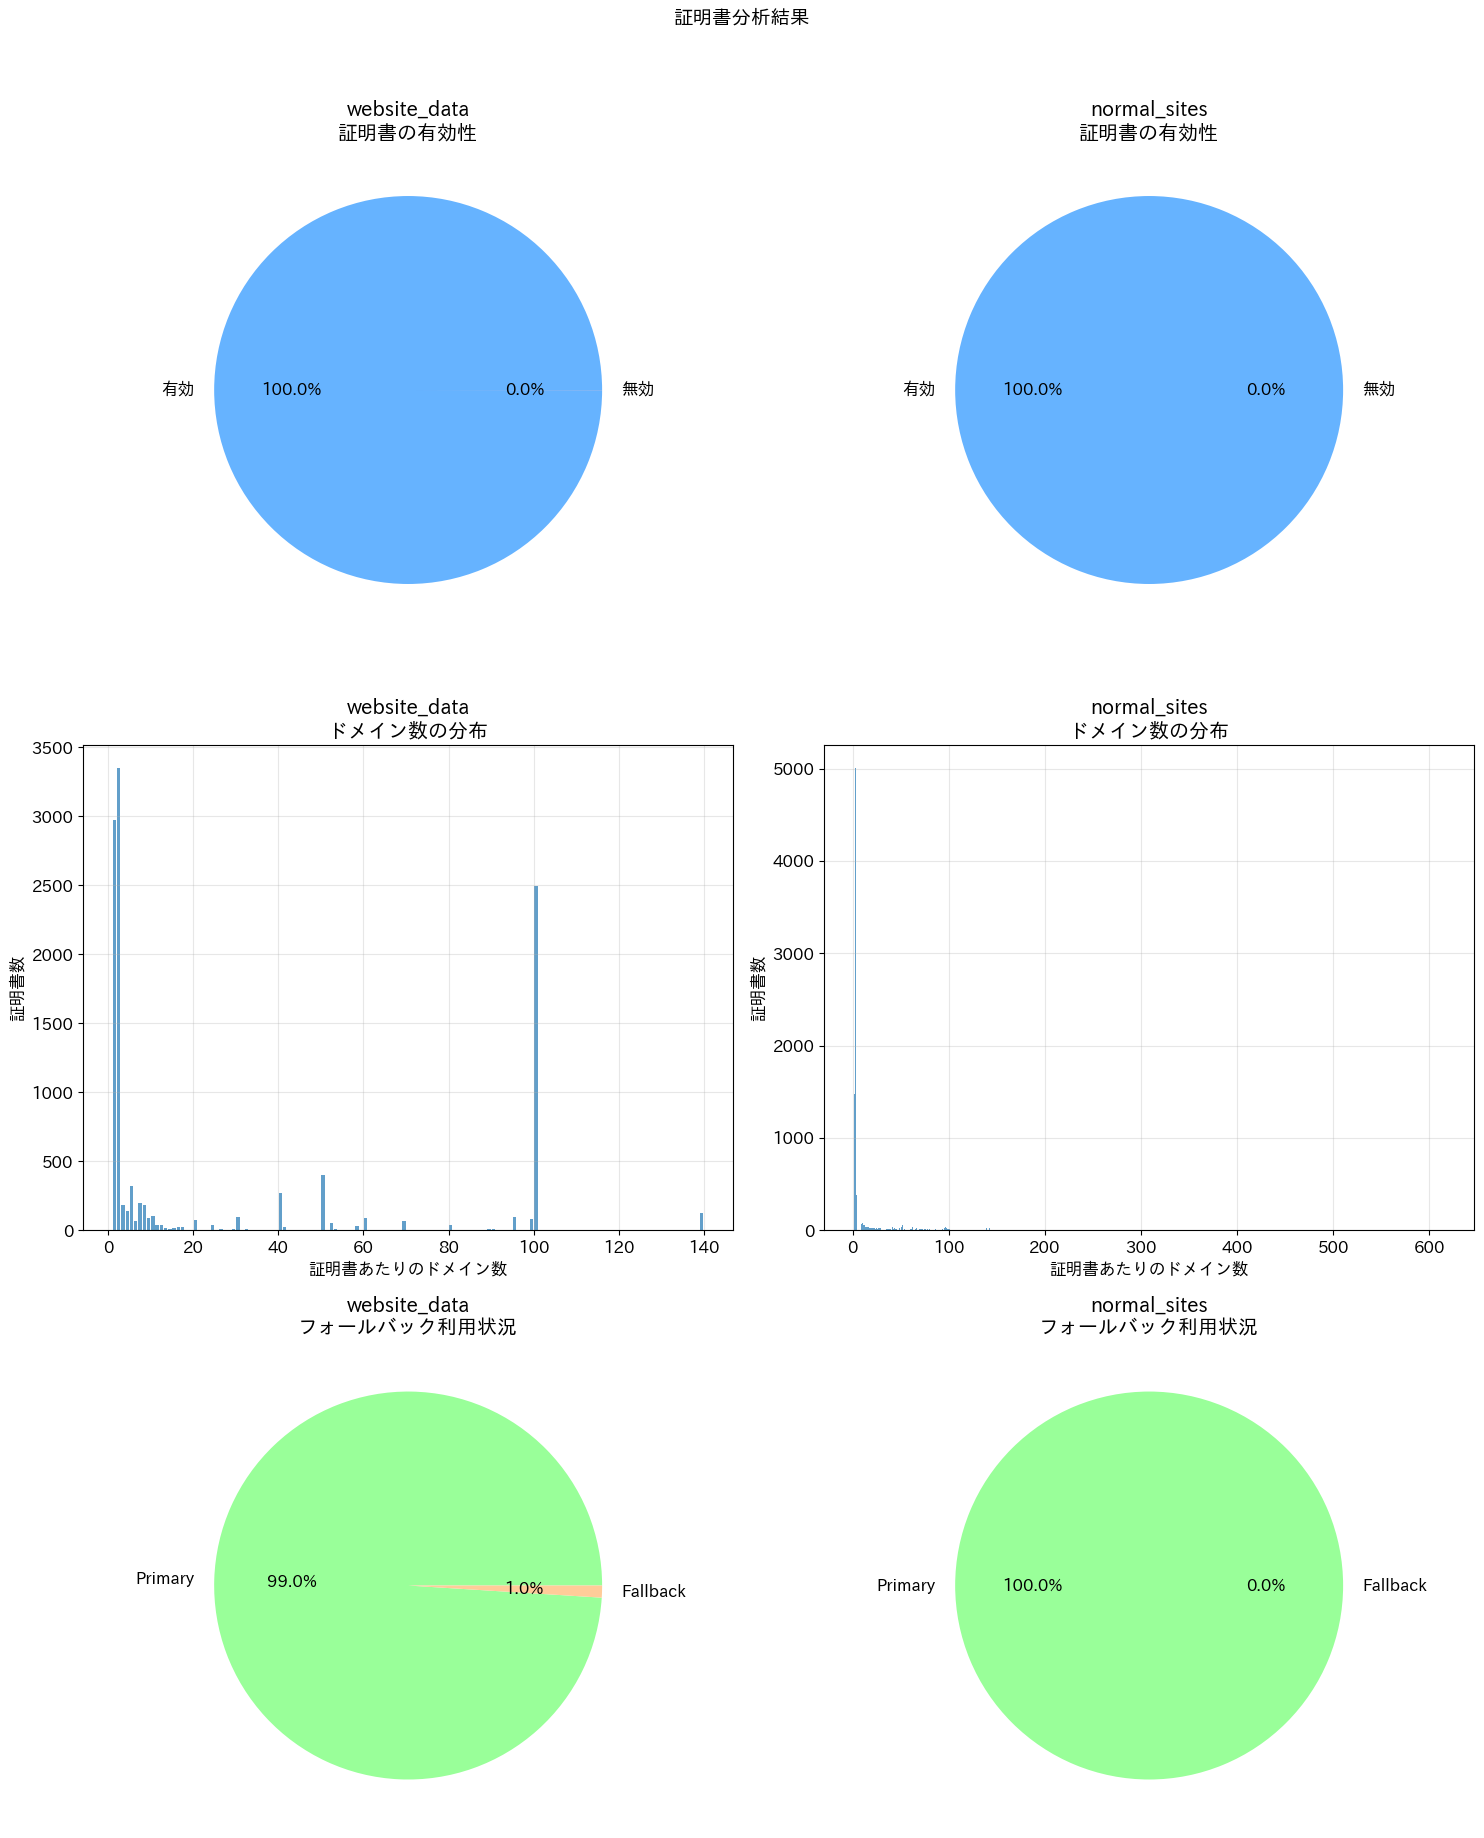

In [1]:
# 05_certificate_analysis_multi_format.ipynb
# Location: RAPIDS/notebooks/certificate_analysis/05_certificate_analysis_multi_format.ipynb

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import json
from cryptography import x509
from cryptography.hazmat.backends import default_backend
import binascii
import matplotlib.pyplot as plt
import japanize_matplotlib
from typing import Dict, List, Optional
import re
from datetime import datetime
from pathlib import Path

class CertificateAnalyzer:
    """証明書の分析を行うクラス（複数の証明書形式に対応）"""
    
    def __init__(self, config_path: str):
        """初期化"""
        # 設定の読み込み
        with open(config_path) as f:
            self.config = json.load(f)['database']
        
        # 出力ディレクトリの設定
        self.output_dir = Path('/home/asomura/waseda/nextstep/RAPIDS/reports/certificate_analysis')
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        # フォント設定
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['IPAexGothic', 'IPAPGothic', 'Yu Gothic']
        
        # エラー統計の初期化
        self.error_stats = {
            'total_processed': 0,
            'success': 0,
            'failures': {
                'asn1_error': 0,
                'hex_error': 0,
                'parse_error': 0,
                'no_domain_error': 0,
                'other_error': 0
            }
        }
        
        # 詳細な結果格納用
        self.detailed_results = []

    def get_engine(self, db_name: str) -> create_engine:
        """データベース接続エンジンを取得"""
        host = '192.168.1.92' if db_name == 'website_data' else '192.168.1.92'
        return create_engine(
            f'postgresql://{self.config["user"]}:{self.config["password"]}@{host}/{db_name}'
        )

    def clean_cert_data(self, cert_data: str) -> Optional[bytes]:
        """
        DER形式の証明書が16進数文字列として与えられた場合のクリーニング。
        PEMやPKCS#7の場合はヘッダーが含まれるため、この処理はスキップされます。
        """
        try:
            if not cert_data:
                return None
            
            # すでにPEM/PKCS7形式の場合はそのまま返す（バイナリ変換は行わない）
            if "-----BEGIN" in cert_data:
                return cert_data.encode('utf-8')
            
            # \xプレフィックスとスペースの除去（hex形式の場合）
            hex_str = cert_data.replace('\\x', '').replace(' ', '')
            
            # 16進数以外の文字を除去
            hex_str = re.sub(r'[^0-9a-fA-F]', '', hex_str)
            
            # 奇数長の場合、0を追加
            if len(hex_str) % 2 != 0:
                hex_str += '0'
            
            return binascii.unhexlify(hex_str)
            
        except (binascii.Error, ValueError) as e:
            self.error_stats['failures']['hex_error'] += 1
            return None

    def load_certificate_from_data(self, cert_data: str) -> x509.Certificate:
        """
        証明書データから x509.Certificate オブジェクトを返す。
        PEM, DER, PKCS#7（PEM/DER）の各形式に対応する。
        """
        if not cert_data:
            raise ValueError("Empty certificate data")
        
        # まず、クリーンなデータを取得（PEMの場合はそのままバイト列に変換）
        raw_data = self.clean_cert_data(cert_data)
        if raw_data is None:
            raise ValueError("Invalid certificate data")
        
        try:
            # PEM形式の場合：-----BEGIN CERTIFICATE-----
            if b"-----BEGIN CERTIFICATE-----" in raw_data:
                # 複数の証明書が連結されている場合、最初のものを使用
                pem_certs = re.findall(b'(-----BEGIN CERTIFICATE-----.*?-----END CERTIFICATE-----)', raw_data, re.DOTALL)
                if pem_certs:
                    return x509.load_pem_x509_certificate(pem_certs[0], default_backend())
                else:
                    raise ValueError("No valid PEM certificate found")
            
            # PEM形式のPKCS7の場合
            if b"-----BEGIN PKCS7-----" in raw_data:
                from cryptography.hazmat.primitives.serialization import pkcs7
                pkcs7_certs = pkcs7.load_pem_pkcs7_certificates(raw_data)
                if pkcs7_certs and len(pkcs7_certs) > 0:
                    return pkcs7_certs[0]
                else:
                    raise ValueError("No valid PEM PKCS7 certificates found")
            
            # DER形式の場合（ここでは raw_data はバイナリとして渡される）
            try:
                return x509.load_der_x509_certificate(raw_data, default_backend())
            except Exception as e:
                # DER形式のPKCS7を試す
                from cryptography.hazmat.primitives.serialization import pkcs7
                pkcs7_certs = pkcs7.load_der_pkcs7_certificates(raw_data)
                if pkcs7_certs and len(pkcs7_certs) > 0:
                    return pkcs7_certs[0]
                else:
                    raise e
        
        except Exception as e:
            raise e

    def extract_domains(self, cert_data: str, original_domain: str) -> Dict:
        """証明書からドメイン情報を抽出（各種証明書形式に対応）"""
        self.error_stats['total_processed'] += 1
        
        try:
            # 証明書データから x509.Certificate オブジェクトを取得
            cert = self.load_certificate_from_data(cert_data)
            domains = set()  # 重複を避けるために set を使用
            
            # SAN (Subject Alternative Name) 拡張から取得を試みる
            for extension in cert.extensions:
                if isinstance(extension.value, x509.SubjectAlternativeName):
                    san_domains = [name.value for name in extension.value 
                                   if isinstance(name, x509.DNSName)]
                    domains.update(san_domains)
            
            # Common Name からも取得（エラーがあっても続行）
            try:
                cn = cert.subject.get_attributes_for_oid(x509.NameOID.COMMON_NAME)
                if cn:
                    domains.add(cn[0].value)
            except Exception:
                pass
            
            # ドメインリストに変換
            domain_list = sorted(list(domains))
            
            # 最低1つのドメインがなければエラー
            if not domain_list:
                self.error_stats['failures']['no_domain_error'] += 1
                return self._create_error_result(original_domain, "No valid domains found")
            
            self.error_stats['success'] += 1
            
            return {
                'original_domain': original_domain,
                'domain_count': len(domain_list),
                'domains': domain_list,
                'is_multi_domain': len(domain_list) > 1,
                'error': None
            }
            
        except ValueError as e:
            self.error_stats['failures']['parse_error'] += 1
            return self._create_error_result(original_domain, f"Parse error: {str(e)}")
            
        except Exception as e:
            if "error parsing asn1 value" in str(e).lower():
                self.error_stats['failures']['asn1_error'] += 1
                return self._create_error_result(original_domain, "ASN.1 parse error")
            else:
                self.error_stats['failures']['other_error'] += 1
                return self._create_error_result(original_domain, f"Error: {str(e)}")

    def _create_error_result(self, domain: str, error_msg: str) -> Dict:
        """エラー結果の生成"""
        return {
            'original_domain': domain,
            'domain_count': 0,
            'domains': [],
            'is_multi_domain': False,
            'error': error_msg
        }

    def extract_domains_with_fallback(self, primary_cert_data: str, fallback_cert_data: Optional[str], original_domain: str) -> Dict:
        """
        primary の証明書データでエラーの場合、fallback のデータで再試行する。
        fallback で成功した場合は、'fallback_used': True を付加する。
        """
        result = self.extract_domains(primary_cert_data, original_domain)
        if result['error'] is None:
            result['fallback_used'] = False
            return result
        else:
            # primary でエラーの場合、fallback のデータが存在すれば再試行
            if fallback_cert_data:
                fallback_result = self.extract_domains(fallback_cert_data, original_domain)
                if fallback_result['error'] is None:
                    fallback_result['fallback_used'] = True
                    return fallback_result
                else:
                    # 両方失敗の場合、エラー内容を併記
                    return self._create_error_result(
                        original_domain,
                        f"Primary error: {result['error']} / Fallback error: {fallback_result['error']}"
                    )
            else:
                return result

    def analyze_certificates(self, db_name: str) -> Dict:
        """証明書の分析を実行（フォールバック機能付き）"""
        print(f"\n{db_name} の分析を開始...")
        
        # fallback カラムも取得
        query = """
            SELECT domain, https_certificate_body, https_certificate_all
            FROM website_data 
            WHERE status = 7 
              AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
        """
        engine = self.get_engine(db_name)
        df = pd.read_sql_query(query, engine)
        print(f"取得したレコード数: {len(df)}")
        
        results = []
        for _, row in df.iterrows():
            primary_cert = row['https_certificate_body']
            fallback_cert = row['https_certificate_all']
            result = self.extract_domains_with_fallback(primary_cert, fallback_cert, row['domain'])
            results.append(result)
            self.detailed_results.append({
                **result, 
                'database': db_name,
                'timestamp': datetime.now()
            })
        
        # 有効な結果のみを用いて統計を計算
        valid_results = [r for r in results if r['domain_count'] > 0]
        total_certs = len(results)
        total_valid = len(valid_results)
        multi_domain_certs = sum(1 for r in valid_results if r['is_multi_domain'])
        domain_counts = [r['domain_count'] for r in valid_results]
        fallback_used_count = sum(1 for r in valid_results if r.get('fallback_used', False))
        
        return {
            'total_certificates': total_certs,
            'valid_certificates': total_valid,
            'invalid_certificates': total_certs - total_valid,
            'multi_domain_certificates': multi_domain_certs,
            'multi_domain_ratio': multi_domain_certs / total_valid if total_valid > 0 else 0,
            'domain_counts': domain_counts,
            'avg_domains_per_cert': np.mean(domain_counts) if domain_counts else 0,
            'max_domains_per_cert': max(domain_counts) if domain_counts else 0,
            'fallback_used_count': fallback_used_count,
            'fallback_used_ratio': fallback_used_count / total_valid if total_valid > 0 else 0,
            'results': results
        }

    def save_detailed_results(self, output_path: Optional[str] = None):
        """詳細な分析結果を CSV ファイルとして保存"""
        if not output_path:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            output_path = self.output_dir / f'cert_analysis_{timestamp}.csv'
        
        df = pd.DataFrame(self.detailed_results)
        df['domains'] = df['domains'].apply(lambda x: ','.join(x) if isinstance(x, list) else '')
        df.to_csv(output_path, index=False)
        print(f"\n詳細な分析結果を保存: {output_path}")

    def print_summary(self, results: Dict[str, Dict]):
        """分析結果のサマリーを表示"""
        print("\n=== 証明書分析サマリー ===")
        
        for db_name, data in results.items():
            print(f"\n{db_name}:")
            print(f"総証明書数: {data['total_certificates']:,}")
            print(f"有効な証明書: {data['valid_certificates']:,} ({data['valid_certificates']/data['total_certificates']*100:.1f}%)")
            print(f"無効な証明書: {data['invalid_certificates']:,} ({data['invalid_certificates']/data['total_certificates']*100:.1f}%)")
            
            if data['valid_certificates'] > 0:
                print(f"\nマルチドメイン証明書数: {data['multi_domain_certificates']:,}")
                print(f"マルチドメイン証明書の割合: {data['multi_domain_ratio']:.1%}")
                print(f"証明書あたりの平均ドメイン数: {data['avg_domains_per_cert']:.2f}")
                print(f"証明書あたりの最大ドメイン数: {data['max_domains_per_cert']}")
                print(f"フォールバック利用証明書数: {data['fallback_used_count']:,} ({data['fallback_used_ratio']:.1%})")
                
                domain_counts = pd.Series(data['domain_counts'])
                print("\nドメイン数の分布:")
                for count, freq in domain_counts.value_counts().sort_index().items():
                    print(f"{count}ドメイン: {freq:,} 件 ({freq/len(domain_counts):.1%})")

    def print_error_stats(self):
        """エラー統計の表示"""
        print("\n=== エラー統計 ===")
        total = self.error_stats['total_processed']
        print(f"処理した証明書の総数: {total:,}")
        print(f"成功: {self.error_stats['success']:,} ({self.error_stats['success']/total*100:.1f}%)")
        
        print("\nエラーの内訳:")
        for error_type, count in self.error_stats['failures'].items():
            if count > 0:
                print(f"- {error_type}: {count:,} ({count/total*100:.1f}%)")

    def plot_results(self, results: Dict[str, Dict]):
        """分析結果の可視化（フォールバック利用状況も表示）"""
        plt.rcParams['font.size'] = 12
        
        # 3行2列のグリッド
        fig, axes = plt.subplots(3, 2, figsize=(15, 18))
        fig.suptitle('証明書分析結果', y=1.02, fontsize=14)
        
        for i, (db_name, data) in enumerate(results.items()):
            col = i  # 0: website_data, 1: normal_sites
            if data['total_certificates'] == 0:
                continue
            
            # 1. 証明書の有効性の円グラフ
            valid_ratio = data['valid_certificates'] / data['total_certificates']
            axes[0, col].pie([valid_ratio, 1-valid_ratio],
                             labels=['有効', '無効'],
                             autopct='%1.1f%%',
                             colors=['#66b3ff', '#ff9999'])
            axes[0, col].set_title(f'{db_name}\n証明書の有効性')
            
            # 2. ドメイン数の分布（ヒストグラム）
            if data['valid_certificates'] > 0 and data['domain_counts']:
                domain_counts = pd.Series(data['domain_counts'])
                axes[1, col].hist(domain_counts, 
                                  bins=range(1, int(max(domain_counts)) + 2),
                                  alpha=0.7,
                                  rwidth=0.8)
                axes[1, col].set_title(f'{db_name}\nドメイン数の分布')
                axes[1, col].set_xlabel('証明書あたりのドメイン数')
                axes[1, col].set_ylabel('証明書数')
                axes[1, col].grid(True, alpha=0.3)
            else:
                axes[1, col].text(0.5, 0.5, 'データなし', horizontalalignment='center')
                axes[1, col].set_title(f'{db_name}\nドメイン数の分布')
            
            # 3. フォールバック利用状況の円グラフ
            if data['valid_certificates'] > 0:
                fallback_count = data['fallback_used_count']
                primary_count = data['valid_certificates'] - fallback_count
                axes[2, col].pie([primary_count, fallback_count],
                                 labels=['Primary', 'Fallback'],
                                 autopct='%1.1f%%',
                                 colors=['#99ff99', '#ffcc99'])
                axes[2, col].set_title(f'{db_name}\nフォールバック利用状況')
            else:
                axes[2, col].text(0.5, 0.5, 'データなし', horizontalalignment='center')
                axes[2, col].set_title(f'{db_name}\nフォールバック利用状況')
        
        plt.tight_layout()

def main():
    # 設定ファイルのパス
    config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
    
    analyzer = CertificateAnalyzer(config_path)
    
    results = {
        'website_data': analyzer.analyze_certificates('website_data'),
        'normal_sites': analyzer.analyze_certificates('normal_sites')
    }
    
    analyzer.print_summary(results)
    analyzer.print_error_stats()
    analyzer.plot_results(results)
    analyzer.save_detailed_results()

if __name__ == "__main__":
    main()

In [2]:
# --- 追加機能: SSL/TLS証明書の認証レベル分析機能 ---
from cryptography.x509.oid import ExtensionOID, NameOID

def analyze_cert_authentication(self, cert: x509.Certificate) -> Dict:
    """
    証明書の認証レベル（DV/OV/EV）を判別し、OV/EVの場合は組織情報の抽出と
    不審な特徴のチェックを行う。
    """
    # デフォルトはDV（Domain Validation）
    cert_type = "DV"
    org_info = None

    # 1. EV判定：証明書ポリシー拡張に EV 証明書の典型的なOID (2.23.140.1.1) が含まれていれば
    try:
        cert_policies = cert.extensions.get_extension_for_oid(ExtensionOID.CERTIFICATE_POLICIES).value
        for policy in cert_policies:
            if policy.policy_identifier.dotted_string == "2.23.140.1.1":
                cert_type = "EV"
                break
    except x509.ExtensionNotFound:
        # CERTIFICATE_POLICIES拡張が存在しない場合はスルー
        pass

    # 2. OV判定：サブジェクトに組織名（O）が存在すれば、DVではなくOVとする（ただしEVが既に判定されている場合はそのまま）
    try:
        subject = cert.subject
        org_attributes = subject.get_attributes_for_oid(NameOID.ORGANIZATION_NAME)
        if org_attributes and cert_type != "EV":
            cert_type = "OV"
    except Exception:
        pass

    # 3. OV/EVの場合は、組織情報の抽出と不審な特徴のチェックを実施
    if cert_type in ("OV", "EV"):
        try:
            get_attr = lambda oid: subject.get_attributes_for_oid(oid)[0].value if subject.get_attributes_for_oid(oid) else ""
            org_name = get_attr(NameOID.ORGANIZATION_NAME)
            org_unit = get_attr(NameOID.ORGANIZATIONAL_UNIT_NAME)
            country = get_attr(NameOID.COUNTRY_NAME)
            state = get_attr(NameOID.STATE_OR_PROVINCE_NAME)
            locality = get_attr(NameOID.LOCALITY_NAME)

            org_info = {
                "organization": org_name,
                "organizational_unit": org_unit,
                "country": country,
                "state": state,
                "locality": locality,
                "suspicious_flags": []
            }

            # 不審な特徴のチェック例

            # 例1: 組織名が極端に短い
            if org_name and len(org_name.strip()) < 3:
                org_info["suspicious_flags"].append("組織名が短すぎる")

            # 例2: 組織名に英数字以外の割合が高い場合
            if org_name:
                alnum_count = sum(1 for c in org_name if c.isalnum())
                if len(org_name) > 0 and alnum_count / len(org_name) < 0.5:
                    org_info["suspicious_flags"].append("組織名の構成が不自然")

            # 例3: 国コードが通常の2文字でない場合
            if country and len(country.strip()) != 2:
                org_info["suspicious_flags"].append("国コードが不正")
        except Exception as e:
            org_info = {"error": f"組織情報抽出エラー: {str(e)}"}

    return {
        "cert_type": cert_type,
        "organization_info": org_info
    }

# CertificateAnalyzerクラスに新メソッド analyze_cert_authentication を追加
CertificateAnalyzer.analyze_cert_authentication = analyze_cert_authentication

def analyze_authentication_levels(self, db_name: str) -> Dict:
    """
    指定したDBから証明書を取得し、各証明書について認証レベル（DV/OV/EV）の判別、
    組織情報抽出を実施した上で統計情報を集計する。
    """
    print(f"\n{db_name} の認証レベル分析を開始...")
    query = """
        SELECT domain, https_certificate_body, https_certificate_all
        FROM website_data 
        WHERE status = 7 
          AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
    """
    engine = self.get_engine(db_name)
    df = pd.read_sql_query(query, engine)
    print(f"取得したレコード数: {len(df)}")
    
    results = []
    dv_count = 0
    ov_count = 0
    ev_count = 0
    unknown_count = 0
    
    for _, row in df.iterrows():
        primary_cert = row['https_certificate_body']
        fallback_cert = row['https_certificate_all']
        try:
            cert = self.load_certificate_from_data(primary_cert)
        except Exception as e:
            if fallback_cert:
                try:
                    cert = self.load_certificate_from_data(fallback_cert)
                except Exception as e2:
                    results.append({
                        'original_domain': row['domain'],
                        'cert_auth': "Parse Error",
                        'details': f"Primary error: {str(e)} / Fallback error: {str(e2)}"
                    })
                    continue
            else:
                results.append({
                    'original_domain': row['domain'],
                    'cert_auth': "Parse Error",
                    'details': str(e)
                })
                continue

        auth_info = self.analyze_cert_authentication(cert)
        cert_type = auth_info.get("cert_type", "Unknown")
        if cert_type == "DV":
            dv_count += 1
        elif cert_type == "OV":
            ov_count += 1
        elif cert_type == "EV":
            ev_count += 1
        else:
            unknown_count += 1

        results.append({
            'original_domain': row['domain'],
            'cert_auth': cert_type,
            'organization_info': auth_info.get("organization_info")
        })
    
    total_cert = len(results)
    return {
        'total_certificates': total_cert,
        'dv_count': dv_count,
        'ov_count': ov_count,
        'ev_count': ev_count,
        'unknown_count': unknown_count,
        'dv_ratio': dv_count / total_cert if total_cert > 0 else 0,
        'ov_ratio': ov_count / total_cert if total_cert > 0 else 0,
        'ev_ratio': ev_count / total_cert if total_cert > 0 else 0,
        'unknown_ratio': unknown_count / total_cert if total_cert > 0 else 0,
        'results': results
    }

# CertificateAnalyzerクラスに新メソッド analyze_authentication_levels を追加
CertificateAnalyzer.analyze_authentication_levels = analyze_authentication_levels

def print_authentication_summary(self, auth_results: Dict, db_name: str):
    """認証レベル分析結果のサマリーを表示する"""
    print(f"\n=== {db_name} の証明書認証レベル分析サマリー ===")
    total = auth_results.get('total_certificates', 0)
    print(f"総証明書数: {total:,}")
    print(f"DV証明書数: {auth_results.get('dv_count', 0):,} ({auth_results.get('dv_ratio', 0)*100:.1f}%)")
    print(f"OV証明書数: {auth_results.get('ov_count', 0):,} ({auth_results.get('ov_ratio', 0)*100:.1f}%)")
    print(f"EV証明書数: {auth_results.get('ev_count', 0):,} ({auth_results.get('ev_ratio', 0)*100:.1f}%)")
    if auth_results.get('unknown_count', 0) > 0:
        print(f"不明または解析エラー: {auth_results.get('unknown_count', 0):,} ({auth_results.get('unknown_ratio', 0)*100:.1f}%)")

# CertificateAnalyzerクラスに新メソッド print_authentication_summary を追加
CertificateAnalyzer.print_authentication_summary = print_authentication_summary

# --- テスト/実行例 ---
def run_authentication_analysis():
    # 設定ファイルのパス（既存と同じ設定を利用）
    config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
    analyzer = CertificateAnalyzer(config_path)
    
    # website_data および normal_sites の両DBで認証レベル分析を実施
    auth_results_website = analyzer.analyze_authentication_levels('website_data')
    auth_results_normal = analyzer.analyze_authentication_levels('normal_sites')
    
    analyzer.print_authentication_summary(auth_results_website, 'website_data')
    analyzer.print_authentication_summary(auth_results_normal, 'normal_sites')
    
    # 必要に応じて、詳細結果をCSVへ保存する処理などを追加可能です

if __name__ == "__main__":
    run_authentication_analysis()


website_data の認証レベル分析を開始...
取得したレコード数: 11833

normal_sites の認証レベル分析を開始...
取得したレコード数: 9591

=== website_data の証明書認証レベル分析サマリー ===
総証明書数: 11,833
DV証明書数: 11,171 (94.4%)
OV証明書数: 659 (5.6%)
EV証明書数: 3 (0.0%)

=== normal_sites の証明書認証レベル分析サマリー ===
総証明書数: 9,591
DV証明書数: 6,969 (72.7%)
OV証明書数: 2,382 (24.8%)
EV証明書数: 240 (2.5%)



# SSL/TLS証明書認証レベルの可視化プログラムの分析

## 1. 概要
本プログラムは、**SSL/TLS証明書の認証レベル（DV/OV/EV）を分析し、結果を可視化**します。  
認証レベルの分析には `CertificateAnalyzer` クラスを利用し、`website_data` および `normal_sites` のデータベースから証明書情報を取得・解析します。  
可視化は **パイチャート（割合）** と **棒グラフ（件数）** の2種類で行います。

## 2. 主要な機能
### 2.1 認証レベル分析の実行
#### `analyze_authentication_levels(db_name: str) -> Dict`
- `CertificateAnalyzer` クラスの `analyze_authentication_levels` メソッドを利用し、データベースから証明書情報を取得。
- 証明書の認証レベル（**DV: Domain Validation, OV: Organization Validation, EV: Extended Validation**）を判定。
- 解析結果を辞書形式で格納し、以下の統計情報を提供：
  - `dv_count`: DV証明書の数
  - `ov_count`: OV証明書の数
  - `ev_count`: EV証明書の数
  - `unknown_count`: 不明または解析エラーの証明書数
  - 各認証レベルの割合 (`dv_ratio`, `ov_ratio`, `ev_ratio`, `unknown_ratio`)

### 2.2 認証レベルの可視化
#### `plot_authentication_results(auth_results: Dict, db_name: str)`
- **パイチャート**
  - `matplotlib.pyplot.pie()` を利用し、各認証レベルの割合を可視化。
  - `labels=['DV', 'OV', 'EV', 'Unknown']` を設定し、異なる色 (`colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']`) で識別。
- **棒グラフ**
  - `matplotlib.pyplot.bar()` を利用し、各認証レベルの証明書数を可視化。
  - 各バーの上に件数を表示し、視覚的に比較しやすくする。

### 2.3 メイン処理の流れ
1. 設定ファイル (`database.json`) をロードし、`CertificateAnalyzer` のインスタンスを作成。
2. `website_data` および `normal_sites` の証明書認証レベルを分析。
3. 分析結果を `plot_authentication_results()` を用いて可視化。

## 3. メリット・特徴
- **SSL/TLS証明書の認証レベルを可視化**  
  → DV, OV, EV 証明書の比率を簡単に把握可能
- **異なるデータベースの結果を比較可能**  
  → `website_data` と `normal_sites` の認証レベルの違いを分析
- **グラフの見やすさを向上**  
  → **パイチャート（割合）** と **棒グラフ（件数）** の両方を使用

## 4. まとめ
本プログラムにより、SSL/TLS証明書の認証レベルを統計・可視化し、サイトのセキュリティ評価を容易に行うことができます。  
企業や研究機関での **証明書分析・監査** に役立つツールとなるでしょう。


website_data の認証レベル分析を開始...
取得したレコード数: 11833

normal_sites の認証レベル分析を開始...
取得したレコード数: 9591


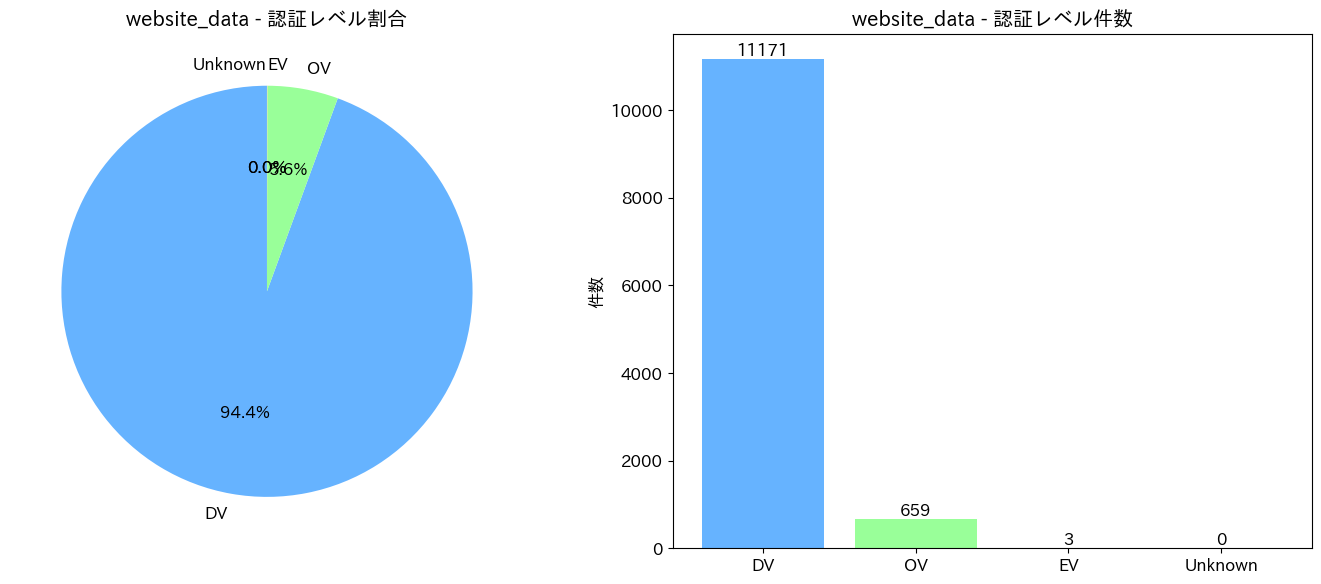

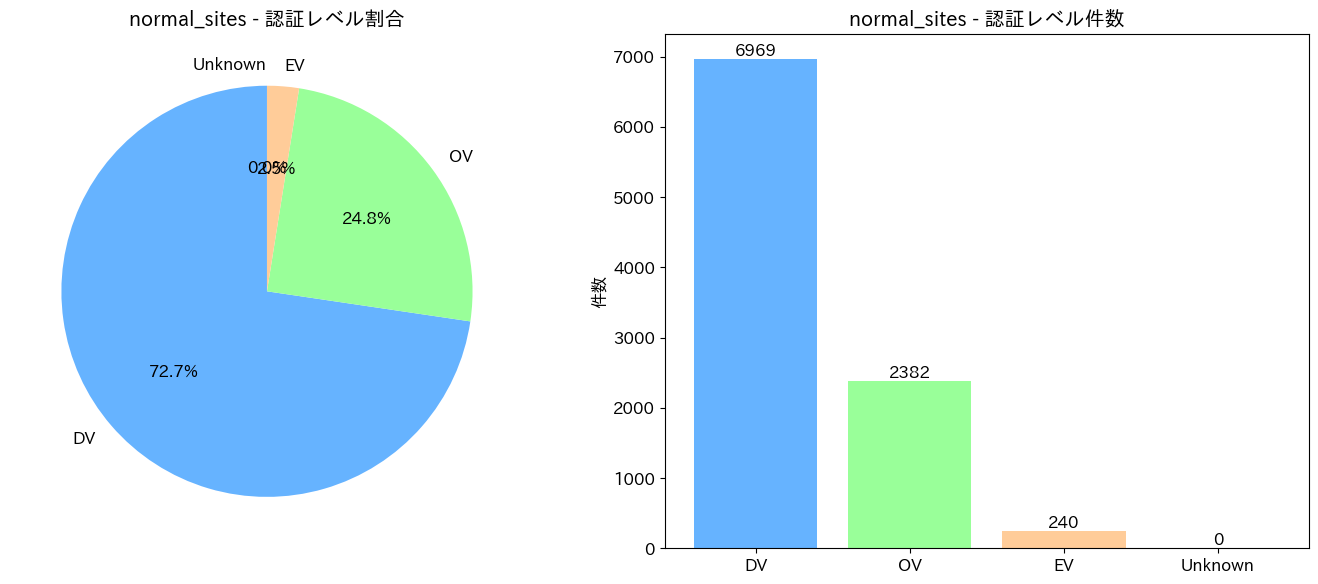

In [3]:
# %% [code]
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 設定ファイルのパス（既存のものを利用）
config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'

# CertificateAnalyzerのインスタンスを生成（既に追加した認証レベル分析機能が利用可能なはず）
analyzer = CertificateAnalyzer(config_path)

# website_data および normal_sites それぞれで認証レベル分析を実施
auth_results_website = analyzer.analyze_authentication_levels('website_data')
auth_results_normal = analyzer.analyze_authentication_levels('normal_sites')

def plot_authentication_results(auth_results, db_name):
    """
    認証レベルの分析結果をパイチャートと棒グラフで可視化する。
    """
    # 各認証レベルの件数を抽出
    dv = auth_results.get('dv_count', 0)
    ov = auth_results.get('ov_count', 0)
    ev = auth_results.get('ev_count', 0)
    unknown = auth_results.get('unknown_count', 0)
    
    labels = ['DV', 'OV', 'EV', 'Unknown']
    counts = [dv, ov, ev, unknown]
    colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
    
    # 2種類のグラフを並べて表示するためにサブプロットを用意
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # パイチャート：割合表示
    axes[0].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[0].set_title(f'{db_name} - 認証レベル割合')
    
    # 棒グラフ：件数表示
    bars = axes[1].bar(labels, counts, color=colors)
    axes[1].set_title(f'{db_name} - 認証レベル件数')
    axes[1].set_ylabel("件数")
    
    # 各棒の上に件数を表示
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
                     ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# website_data の認証レベル分析結果を可視化
plot_authentication_results(auth_results_website, 'website_data')

# normal_sites の認証レベル分析結果を可視化
plot_authentication_results(auth_results_normal, 'normal_sites')
